# Predict whether the credit card user will stay or not

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Data preprocessing
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dataset.shape

(10000, 14)

In [6]:
pd.crosstab(dataset["Gender"], dataset["Exited"])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


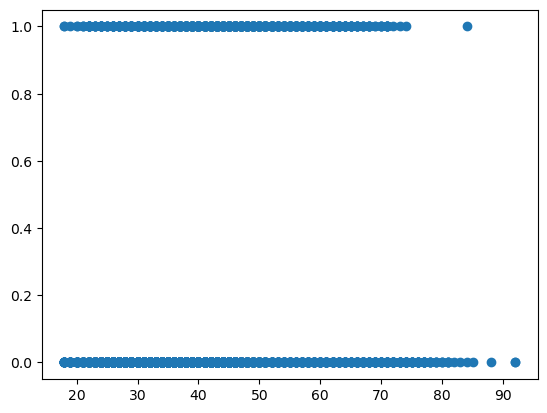

In [7]:
plt.scatter(dataset["Age"], dataset["Exited"])

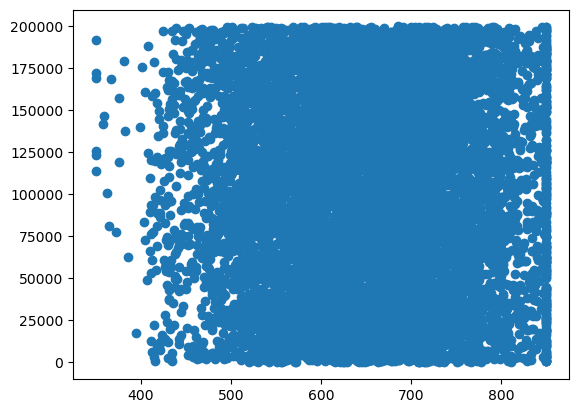

In [8]:
plt.scatter(dataset["CreditScore"], dataset["EstimatedSalary"])

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

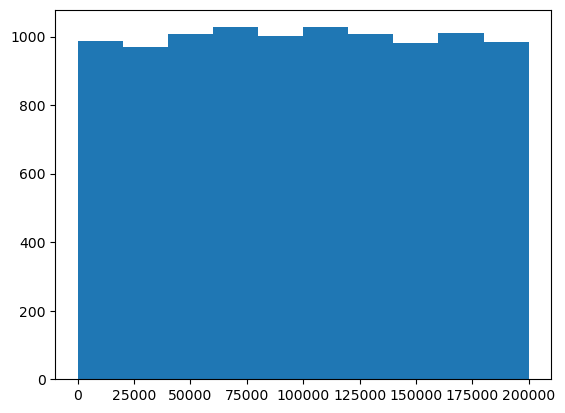

In [9]:
plt.hist(dataset["EstimatedSalary"])

<BarContainer object of 10000 artists>

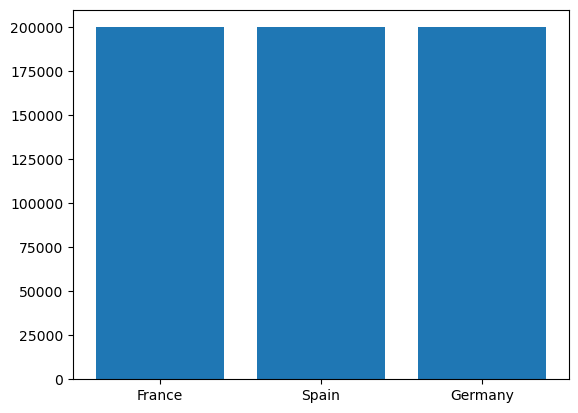

In [10]:
plt.bar(dataset["Geography"], dataset["EstimatedSalary"])

<BarContainer object of 10000 artists>

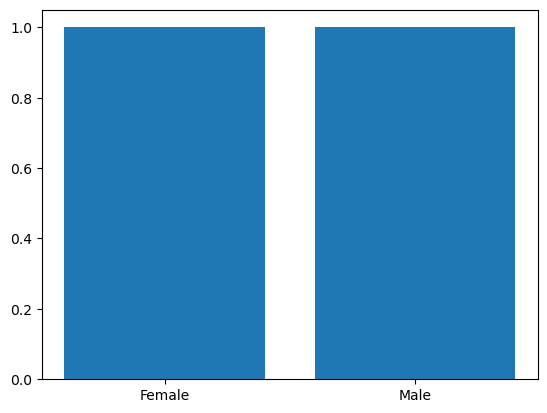

In [11]:
plt.bar(dataset["Gender"], dataset["HasCrCard"])

In [12]:
pd.crosstab(dataset["Gender"], dataset["HasCrCard"])

HasCrCard,0,1
Gender,,
Female,1351,3192
Male,1594,3863


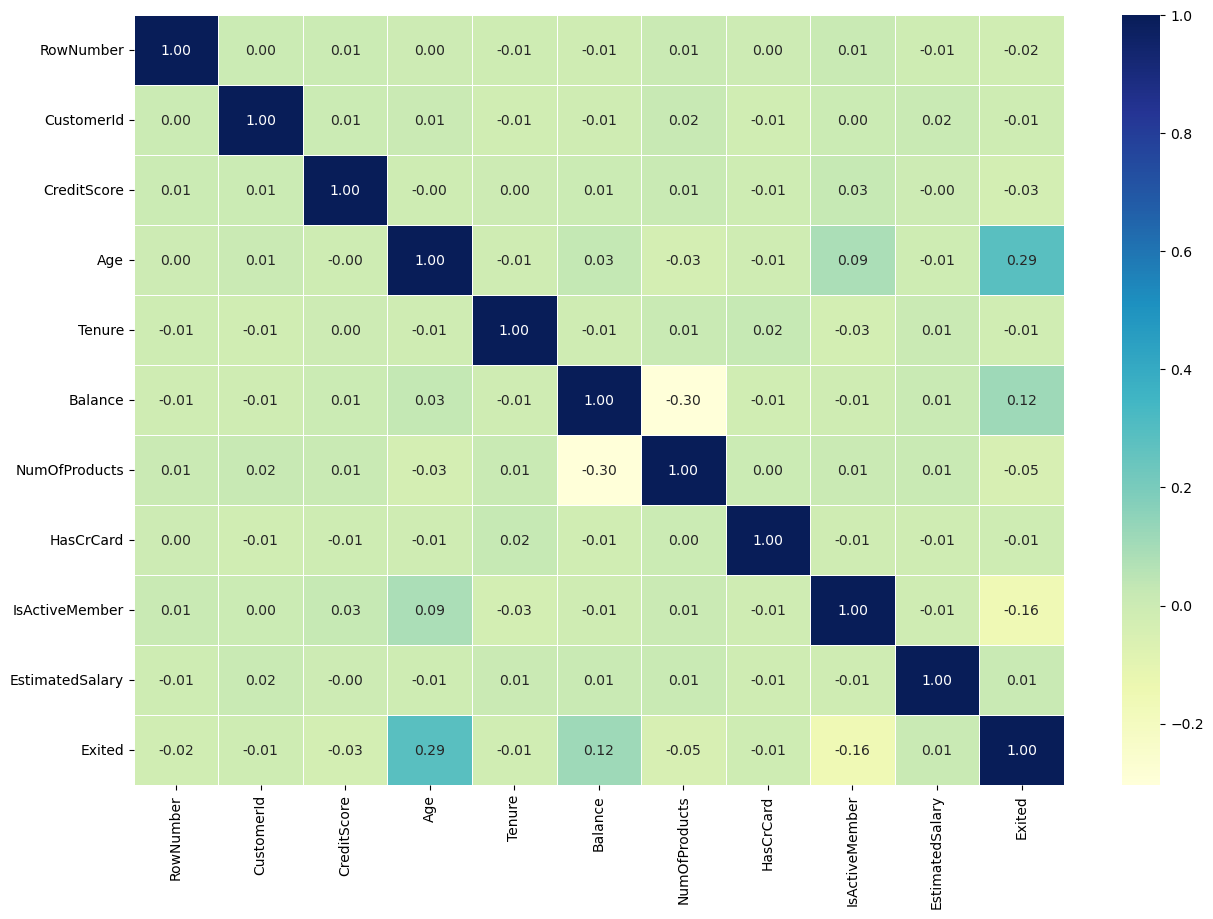

In [13]:
import seaborn as sns
cor_mat = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu") 

In [14]:
# Splitting into features and target
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [15]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
# Encoding the gender into categorical variable since the algorithm takes numerical value. It is a binary value which will be changed to 0 or 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 2] = le.fit_transform(X.iloc[:, 2])

In [18]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [19]:
# Onehotencoding the geography column to convert the geography into numerical value (split into 3 values)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oht = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(oht.fit_transform(X))

In [20]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [21]:
print(X[0, :])

[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
 4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0134888e+05]


In [22]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Building ANN
##### Build fully connected layers using dense class as much as required which is in the keras package.
##### Rectifier activation is applied to the hidden layers and sigmoid function as activation in the output layer.

In [24]:
# Initializing the ANN in sequential class using keras
ANN = tf.keras.models.Sequential()

In [25]:
# Input and 1st hidden layers using dense class for fully connected neuron layers
ANN.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [26]:
# Adding 2nd hidden layer
ANN.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [27]:
# Adding the output layer
# We need only 1 neuron to encode the output to either 0 or 1
ANN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

In [28]:
# Compiling the ANN
# We choose optimizer function (stochastic gradient descent), loss function and metric which is accuracy
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Training the ANN
ANN.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 4ms/step - loss: 0.5897 - accuracy: 0.7032
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8041
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8124
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8192
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8320
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8372
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3716 - accuracy: 0.8430
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8450
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8451
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3568 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8639
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8631
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8639
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8624
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8640
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8641
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8633
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8630
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8629
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 

In [30]:
# Must be a 2d array
# We get the probability
print(ANN.predict(ss.transform([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.0000000e+02, 1.0000000e+00,  4.0000000e+01, 3.0000000e+00, 4.0000000e+04, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 8.0000000e+05]])))

1/1 [==============================] - 0s 364ms/step
[[0.03172001]]


In [31]:
# Customer stays in the bank
print(ANN.predict(ss.transform([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.0000000e+02, 1.0000000e+00,  4.0000000e+01, 3.0000000e+00, 4.0000000e+04, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 8.0000000e+05]])) > 0.5)

1/1 [==============================] - 0s 140ms/step
[[False]]


In [32]:
# Now we predict the test results
y_preds = ANN.predict(X_test)
y_preds = (y_preds > 0.5)

63/63 [==============================] - 0s 2ms/step


In [33]:
y_preds[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_preds)
print(conf)
accuracy_score(y_test, y_preds)

[[1543   52]
 [ 216  189]]


0.866